# Train

**Algorithms**:

**K-Nearest Neighbors (KNN):**
- *Pros:* Intuitive, no complex training required.
- *Cons:* Performance may degrade with large datasets, sensitive to feature scale.

**Decision Trees:**
- *Pros:* Intuitive, automatically handles relevant features.
- *Cons:* Tendency to overfit, can be unstable with small variations in data.

**Linear Regression:**
- *Pros:* Simple and interpretable, suitable for capturing linear relationships.
- *Cons:* Sensitive to outliers, may not handle complex stock price movements well.

**Logistic Regression:**
- *Pros:* Suitable for binary classification tasks.
- *Cons:* Assumes linear relationship, may struggle with capturing intricate stock price patterns.

**Support Vector Machines (SVM):**
- *Pros:* Good in high-dimensional spaces.
- *Cons:* Requires careful parameter tuning, may not be optimal for large datasets.

**Random Forest:**
- *Pros:* Effective at handling complexity, provides feature importance.
- *Cons:* Less interpretable, training can be time-consuming.

**Ensemble Methods:**
- *Pros:* Combines models for improved performance.
- *Cons:* Complexity and interpretability challenges.

**Neural Networks:**
- *Pros:* Effective for complex, non-linear patterns.
- *Cons:* Requires substantial data and computational resources, architecture complexity.

We exclude Linear Regression, Decision Trees, Support Vector Machines (SVM), and Convolutional Neural Networks (CNN).

**Considerations**:

We can use the remaining algorithms to split the problem into three categories: Target 1 day, Target 5 days, Target 30 days. If the prediction doesn't belong to any of these categories, we classify the problem as Unsafe.

We then train the dataset to find the best algorithm with the following algorithms:
- Knn
- Logistic Regression 
- Random Forests
- Ensemble Methods: 
- Neural Networks:

# Import Data

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
df = pd.ExcelFile('final_dataset.xlsx').parse('Sheet1')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Return,Target_1day,...,MA_30,MA_50,RSI,MACD,Signal_Line,Bollinger_Mid_Band,Bollinger_Upper_Band,Bollinger_Lower_Band,Volatility,Ticker
0,2020-06-30,179.305945,183.533295,179.102439,182.802521,3102800,0.0,0.0,0.021450,0,...,185.971379,177.444586,40.980241,0.824023,3.006285,190.221655,205.998882,174.444429,0.053545,GS
1,2020-07-01,183.968061,184.763579,180.859992,182.756287,2620100,0.0,0.0,-0.000253,0,...,186.614105,177.904132,52.500011,0.573091,2.519646,189.620391,205.574176,173.666606,0.051360,GS
2,2020-07-02,187.316608,187.779118,182.349254,182.598999,2699400,0.0,0.0,-0.000861,1,...,187.140969,178.320634,46.428544,0.357413,2.087199,188.814696,204.471975,173.157416,0.044924,GS
3,2020-07-06,186.243599,192.209977,186.049352,191.812225,3567700,0.0,0.0,0.050456,0,...,188.016001,178.938500,50.786526,0.919320,1.853623,188.326285,202.922613,173.729956,0.021055,GS
4,2020-07-07,190.091704,190.285964,184.254827,184.412079,2853500,0.0,0.0,-0.038580,1,...,188.649571,179.372512,42.843182,0.758759,1.634651,187.334203,200.017990,174.650416,0.032740,GS


### Data Preprocessing

Let's transform the following features into float-type data. This transformation is essential to ensure that the data can be processed by our training algorithms effectively. Converting these features to float allows our algorithms to handle and analyze the data appropriately during the training process. This step is crucial for the accuracy and efficiency of the machine learning models we'll be using.

In [6]:
df['Date'] = pd.to_datetime(df['Date']).astype(int) / 10**9
df['Ticker'] = pd.factorize(df.Ticker)[0]
df['Volume'] = df['Volume'].astype(float)
df['Target_1day'] = df['Target_1day'].astype(float)
df['Target_5days'] = df['Target_5days'].astype(float)
df['Target_30days'] = df['Target_30days'].astype(float)
df['Net Income'] = df['Net Income'].astype(float)
df['Total Revenue'] = df['Total Revenue'].astype(float)
df['Normalized EBITDA'] = df['Normalized EBITDA'].astype(float)
df['Total Unusual Items'] = df['Total Unusual Items'].astype(float)
df['Total Unusual Items Excluding Goodwill'] = df['Total Unusual Items Excluding Goodwill'].astype(float)
df['Operating Cash Flow'] = df['Operating Cash Flow'].astype(float)
df['Capital Expenditure'] = df['Capital Expenditure'].astype(float)
df['Free Cash Flow'] = df['Free Cash Flow'].astype(float)
df['Cash Flow From Continuing Operating Activities'] = df['Cash Flow From Continuing Operating Activities'].astype(float)
df['Cash Flow From Continuing Investing Activities'] = df['Cash Flow From Continuing Investing Activities'].astype(float)
df['Cash Flow From Continuing Financing Activities'] = df['Cash Flow From Continuing Financing Activities'].astype(float)
df['Ticker'] = df['Ticker'].astype(float)

### Splitting the Data

The dataset `df` is divided into features (`X`) and three different target variables (`Y_1`, `Y_2`, and `Y_3`), corresponding to predicting stock values for 1, 5, and 30 days, respectively. The data is then split into training (80%), validation (20%), and test sets (20%). This separation ensures that the machine learning models can be trained, validated, and tested on distinct subsets of the data, facilitating the evaluation of their performance on different time horizons.

In [7]:
X = df.drop(['Target_1day', 'Target_5days', 'Target_30days'], axis=1)
Y_1 = df['Target_1day']
Y_2 = df['Target_5days']
Y_3 = df['Target_30days']

X_train_1_80, X_test_1, Y_train_1_80, Y_test_1 = train_test_split(X, Y_1, test_size=0.2)
X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(X_train_1_80, Y_train_1_80, test_size=0.20)


X_train_2_80, X_test_2, Y_train_2_80, Y_test_2 = train_test_split(X, Y_2, test_size=0.2)
X_valid_2, X_train_2, Y_valid_2, Y_train_2 = train_test_split(X_train_2_80, Y_train_2_80, test_size=0.20)

X_train_3_80, X_test_3, Y_train_3_80, Y_test_3 = train_test_split(X, Y_3, test_size=0.2)
X_valid_3, X_train_3, Y_valid_3, Y_train_3 = train_test_split(X_train_3_80, Y_train_3_80, test_size=0.20)

In the subsequent section of the document, we will be conducting testing on the selected machine learning algorithms to assess their performance in predicting stock values. The focus will be on evaluating the algorithms based on accuracy to determine which one is most effective for solving this specific problem. This testing phase aims to provide insights into the algorithm that yields the most accurate predictions for the given dataset and target variables.

# Knn

In this section, we explore the K-Nearest Neighbors (KNN) algorithm by varying the parameter K, which represents the number of neighbors considered for classification. The objective is to identify the optimal K value that produces the most accurate predictions for our specific stock value prediction problem. By systematically testing different K values, we aim to determine the configuration that yields the highest accuracy, providing valuable insights into the performance of the KNN algorithm in this context.

In [12]:
best_k = []
for i in [5,10,15,20,25]:
    print('K: ' + str(i) + '\n')
    # Target 1 day
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(X_train_1, Y_train_1)
    train_acc_1 = accuracy_score(y_true= Y_train_1, y_pred= knn_1.predict(X_train_1))
    valid_acc_1 = accuracy_score(y_true= Y_valid_1, y_pred= knn_1.predict(X_valid_1))
    print("Train set 1: {:.2f}".format(train_acc_1))
    print('Validation set 1: {:.2f}'.format(valid_acc_1))
    # Target 5 days
    knn_2 = KNeighborsClassifier(n_neighbors=i)
    knn_2.fit(X_train_2, Y_train_2)
    train_acc_2 = accuracy_score(y_true= Y_train_2, y_pred= knn_2.predict(X_train_2))
    valid_acc_2 = accuracy_score(y_true= Y_valid_2, y_pred= knn_2.predict(X_valid_2))
    print("Train set 2: {:.2f}".format(train_acc_2))
    print('Validation set 2: {:.2f}'.format(valid_acc_2))
    # Target 30 days
    knn_3 = KNeighborsClassifier(n_neighbors=i)
    knn_3.fit(X_train_3, Y_train_3)
    train_acc_3 = accuracy_score(y_true= Y_train_3, y_pred= knn_3.predict(X_train_3))
    valid_acc_3 = accuracy_score(y_true= Y_valid_3, y_pred= knn_3.predict(X_valid_3))
    print("Train set 3: {:.2f}".format(train_acc_3))
    print('Validation set 3: {:.2f}'.format(valid_acc_3))
    print('\n')
    best_k.append([i, (valid_acc_1 + valid_acc_2 + valid_acc_3) / 3])
    
k = max(best_k, key=lambda x:x[1])[0]
print('Best K: ' + str(k) + '\n')
# Target 1 day
knn_1 = KNeighborsClassifier(n_neighbors=k)
knn_1.fit(X_train_1_80, Y_train_1_80)
test_acc_1 = accuracy_score(y_true= Y_test_1, y_pred= knn_1.predict(X_test_1))
print('Test set 1: {:.2f}'.format(test_acc_1))

# Target 5 days
knn_2 = KNeighborsClassifier(n_neighbors=k)
knn_2.fit(X_train_2_80, Y_train_2_80)
test_acc_2 = accuracy_score(y_true= Y_test_2, y_pred= knn_2.predict(X_test_2))
print('Test set 2: {:.2f}'.format(test_acc_2))

# Target 30 days
knn_3 = KNeighborsClassifier(n_neighbors=k)
knn_3.fit(X_train_3_80, Y_train_3_80)
test_acc_3 = accuracy_score(y_true= Y_test_3, y_pred= knn_3.predict(X_test_3))
print('Test set 3: {:.2f}'.format(test_acc_3))

# Total acc
print('Total acc: {:.2f}'.format((test_acc_1 + test_acc_2 + test_acc_3) / 3))

K: 5
Train set 1: 0.70
Validation set 1: 0.52
Train set 2: 0.73
Validation set 2: 0.56
Train set 3: 0.83
Validation set 3: 0.73


K: 10
Train set 1: 0.63
Validation set 1: 0.52
Train set 2: 0.65
Validation set 2: 0.54
Train set 3: 0.75
Validation set 3: 0.68


K: 15
Train set 1: 0.61
Validation set 1: 0.51
Train set 2: 0.63
Validation set 2: 0.54
Train set 3: 0.69
Validation set 3: 0.63


K: 20
Train set 1: 0.59
Validation set 1: 0.51
Train set 2: 0.62
Validation set 2: 0.54
Train set 3: 0.66
Validation set 3: 0.62


K: 25
Train set 1: 0.58
Validation set 1: 0.51
Train set 2: 0.60
Validation set 2: 0.54
Train set 3: 0.65
Validation set 3: 0.61


Best K: 5
Test set 1: 0.51
Test set 2: 0.66
Test set 3: 0.85
Total acc: 0.67


There are some important considerations to take into account:

1. **Small \(k\):** A small \(k\) value implies that the prediction for a data point is heavily influenced by its immediate neighbors. This makes the model sensitive to local variations in the training data, which might not generalize well to unseen data.

2. **Performance on Test Sets:**
   - **Target 1 (1 day):** The model achieved an accuracy of 51%, suggesting a relatively weak predictive performance for the next day.
   - **Target 2 (5 days):** The accuracy increased to 66%, indicating a better performance in predicting the stock values over a 5-day period.
   - **Target 3 (30 days):** The model exhibited the highest accuracy of 85%, suggesting a better ability to predict stock values over a longer timeframe.

3. **Total Accuracy:**
   - The total accuracy across all targets is reported as 67%, which is the average of the accuracies for the three target variables.

4. **Generalization Concerns:** While the model might perform well on the training and validation sets, the real test lies in its ability to generalize to unseen data. The model's performance on the test sets should be carefully examined to assess its effectiveness in predicting stock values for different time horizons.

In conclusion, the current model with \(k=5\) exhibits varying performance across different target variables. The trade-off between bias and variance needs to be carefully managed, and further exploration of hyperparameter values is recommended for a more robust and reliable KNN model.

# Logistic Regression

In this section, we explore the training process of Logistic Regression for the stock prediction problem, aiming to analyze its outcomes. Logistic Regression is a well-established algorithm for binary classification tasks, making it suitable for predicting whether stock values will rise or fall.

First of all we scale the data to improve the performance of the algorithm:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_1_80_scaled = scaler.fit_transform(X_train_1_80)
X_valid_1_scaled = scaler.transform(X_valid_1)
X_test_1_scaled = scaler.transform(X_test_1)
X_train_1_scaled = scaler.transform(X_train_1)

X_train_2_80_scaled = scaler.fit_transform(X_train_2_80)
X_valid_2_scaled = scaler.transform(X_valid_2)
X_test_2_scaled = scaler.transform(X_test_2)
X_train_2_scaled = scaler.transform(X_train_2)

X_train_3_80_scaled = scaler.fit_transform(X_train_3_80)
X_valid_3_scaled = scaler.transform(X_valid_3)
X_test_3_scaled = scaler.transform(X_test_3)
X_train_3_scaled = scaler.transform(X_train_3)

In [23]:
# Train
# Target 1 day
lr_1 = LogisticRegression(max_iter=1000)
lr_1.fit(X_train_1_scaled, Y_train_1)
train_acc_1 = accuracy_score(y_true= Y_train_1, y_pred= lr_1.predict(X_train_1_scaled))
valid_acc_1 = accuracy_score(y_true= Y_valid_1, y_pred= lr_1.predict(X_valid_1_scaled))
print("Train set 1: {:.2f}".format(train_acc_1))
print('Validation set 1: {:.2f}'.format(valid_acc_1))
# Target 5 days
lr_2 = LogisticRegression(max_iter=1000)
lr_2.fit(X_train_2_scaled, Y_train_2)
train_acc_2 = accuracy_score(y_true= Y_train_2, y_pred= lr_2.predict(X_train_2_scaled))
valid_acc_2 = accuracy_score(y_true= Y_valid_2, y_pred= lr_2.predict(X_valid_2_scaled))
print("Train set 2: {:.2f}".format(train_acc_2))
print('Validation set 2: {:.2f}'.format(valid_acc_2))
# Target 30 days
lr_3 = LogisticRegression(max_iter=1000)
lr_3.fit(X_train_3_scaled, Y_train_3)
train_acc_3 = accuracy_score(y_true= Y_train_3, y_pred= lr_3.predict(X_train_3_scaled))
valid_acc_3 = accuracy_score(y_true= Y_valid_3, y_pred= lr_3.predict(X_valid_3_scaled))
print("Train set 3: {:.2f}".format(train_acc_3))
print('Validation set 3: {:.2f}'.format(valid_acc_3))
print('\n')

Train set 1: 0.52
Validation set 1: 0.51
Train set 2: 0.53
Validation set 2: 0.51
Train set 3: 0.56
Validation set 3: 0.55


In [24]:
# Test
# Target 1 day
lr_1 = LogisticRegression(max_iter=1000)
lr_1.fit(X_train_1_80_scaled, Y_train_1_80)
test_acc_1 = accuracy_score(y_true= Y_test_1, y_pred= lr_1.predict(X_test_1_scaled))
print('Test set 1: {:.2f}'.format(test_acc_1))

# Target 5 days
lr_2 = LogisticRegression(max_iter=1000)
lr_2.fit(X_train_2_80_scaled, Y_train_2_80)
test_acc_2 = accuracy_score(y_true= Y_test_2, y_pred= lr_2.predict(X_test_2_scaled))
print('Test set 2: {:.2f}'.format(test_acc_2))

# Target 30 days
lr_3 = LogisticRegression(max_iter=1000)
lr_3.fit(X_train_3_80_scaled, Y_train_3_80)
test_acc_3 = accuracy_score(y_true= Y_test_3, y_pred= lr_3.predict(X_test_3_scaled))
print('Test set 3: {:.2f}'.format(test_acc_3))

# Total acc
print('Total acc: {:.2f}'.format((test_acc_1 + test_acc_2 + test_acc_3) / 3))

Test set 1: 0.50
Test set 2: 0.53
Test set 3: 0.56
Total acc: 0.53


The logistic regression results you've provided indicate modest accuracy across the different prediction targets. Here are some considerations:

1. **Accuracy Levels**: The accuracy levels for the three target periods (1 day, 5 days, and 30 days) range from 0.50 to 0.56, with an overall accuracy of 0.53. These values suggest that the logistic regression model is making predictions slightly better than random chance.

2. **Similar Performance**: The accuracy levels are relatively close for the different target periods, indicating a consistent but not particularly strong predictive performance across various prediction horizons.

3. **Room for Improvement**: The overall accuracy of 0.53 suggests that there is room for improvement in the model. Depending on the specific requirements of your application, you might explore other algorithms, feature engineering, or hyperparameter tuning to enhance predictive performance.

Remember, the interpretation of the results should also consider the characteristics of your dataset, the nature of the stock market data, and the assumptions made by the logistic regression model. Additionally, for time-series data, more advanced models that capture temporal dependencies may be worth exploring.

# Random Forest

In [ ]:
best_i = []
for i in [2,10,30,50,70,100,500,1000]:
    print('Max depth: ' + str(i) + '\n')
    
    # Target 1 day
    rm_1 = RandomForestClassifier(max_depth=i)
    rm_1.fit(X_train_1, Y_train_1)
    train_acc_1 = accuracy_score(y_true= Y_train_1, y_pred= rm_1.predict(X_train_1))
    scores_1 = cross_val_score(rm_1, X_train_1_80, Y_train_1_80, 
                             cv=5, scoring='accuracy', 
                             verbose = 0)
    print("Train set 1: {:.2f}".format(train_acc_1))
    print('Validation set 1: {:.2f}'.format(scores_1.mean()))
    print('\n')
    # Target 5 days
    rm_2 = RandomForestClassifier(max_depth=i)
    rm_2.fit(X_train_2, Y_train_2)
    train_acc_2 = accuracy_score(y_true= Y_train_2, y_pred= rm_2.predict(X_train_2))
    scores_2 = cross_val_score(rm_2, X_train_2_80, Y_train_2_80, 
                             cv=5, scoring='accuracy', 
                             verbose = 0)
    print("Train set 2: {:.2f}".format(train_acc_2))
    print('Validation set 2: {:.2f}'.format(scores_2.mean()))
    print('\n')
    # Target 30 days
    rm_3 = RandomForestClassifier(max_depth=i)
    rm_3.fit(X_train_3, Y_train_3)
    train_acc_3 = accuracy_score(y_true= Y_train_3, y_pred= rm_3.predict(X_train_3))
    scores_3 = cross_val_score(rm_3, X_train_3_80, Y_train_3_80, 
                             cv=5, scoring='accuracy', 
                             verbose = 0)
    print("Train set 3: {:.2f}".format(train_acc_3))
    print('Validation set 3: {:.2f}'.format(scores_3.mean()))
    print('\n')
    
    best_i.append([i, scores_1.mean() + scores_2.mean() + scores_3.mean()])
    
    
i = max(best_i, key=lambda x:x[1])[0]
print('Best max depth: ' + str(i) + '\n')
# Target 1 day
rm_1 = RandomForestClassifier(max_depth=i)
rm_1.fit(X_train_1_80, Y_train_1_80)
test_acc_1 = accuracy_score(y_true= Y_test_1, y_pred= rm_1.predict(X_test_1))
print('Test set 1: {:.2f}'.format(test_acc_1))

# Target 5 days
rm_2 = RandomForestClassifier(max_depth=i)
rm_2.fit(X_train_2_80, Y_train_2_80)
test_acc_2 = accuracy_score(y_true= Y_test_2, y_pred= rm_2.predict(X_test_2))
print('Test set 2: {:.2f}'.format(test_acc_2))

# Target 30 days
rm_3 = RandomForestClassifier(max_depth=i)
rm_3.fit(X_train_3_80, Y_train_3_80)
test_acc_3 = accuracy_score(y_true= Y_test_3, y_pred= rm_3.predict(X_test_3))
print('Test set 3: {:.2f}'.format(test_acc_3))

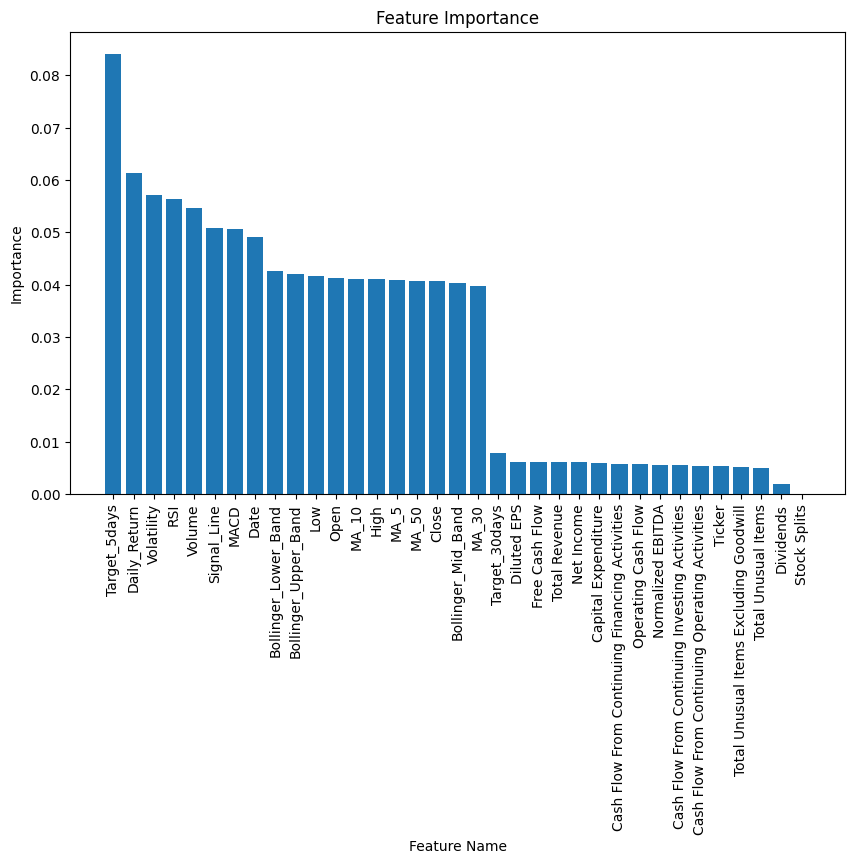

Sum 1.0


In [22]:
# Visualizzazione con un istogramma dell'importanza delle feature
import numpy as np

import matplotlib.pyplot as plt
importances = rm_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rm_1.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Calculate the cumulative importance
cumulative_importance = np.cumsum(importances)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_1_80.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_1_80.shape[1]), X_train_1_80.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.show()


# Neural Networks

In [ ]:

# Train 1

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_1, Y_train_1)
Y_pred_1 = clf.predict(X_test_1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test_1, Y_test_1)))


In [ ]:

# Train 2

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_2, Y_train_2)
Y_pred_2 = clf.predict(X_test_2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test_2, Y_test_2)))


In [ ]:

# Train 3

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_3, Y_train_3)
Y_pred_3 = clf.predict(X_test_3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test_3, Y_test_3)))


In [ ]:
best_i = []
for i in [100,500,1000]:
    print('Max iter: ' + str(i) + '\n')
    for j in [1,7,10,20]:
        print('Random state: ' + str(j) + '\n')
        # Target 1 day
        ann = MLPClassifier(random_state=j, max_iter=i)
        ann.fit(X_train_1, Y_train_1)
        train_acc_1 = accuracy_score(y_true= Y_train_1, y_pred= ann.predict(X_train_1))
        scores_1 = cross_val_score(ann, X_train_1_80, Y_train_1_80, 
                                 cv=5, scoring='accuracy', 
                                 verbose = 0)
        print("Train set 1: {:.2f}".format(train_acc_1))
        print('Validation set 1: {:.2f}'.format(scores_1.mean()))
        print('\n')
        # Target 5 days
        ann = MLPClassifier(random_state=j, max_iter=i)
        ann.fit(X_train_2, Y_train_2)
        train_acc_2 = accuracy_score(y_true= Y_train_2, y_pred= ann.predict(X_train_2))
        scores_2 = cross_val_score(ann, X_train_2_80, Y_train_2_80, 
                                 cv=5, scoring='accuracy', 
                                 verbose = 0)
        print("Train set 2: {:.2f}".format(train_acc_2))
        print('Validation set 2: {:.2f}'.format(scores_2.mean()))
        print('\n')
        # Target 30 days
        ann = MLPClassifier(random_state=j, max_iter=i)
        ann.fit(X_train_3, Y_train_3)
        train_acc_3 = accuracy_score(y_true= Y_train_3, y_pred= ann.predict(X_train_3))
        scores_3 = cross_val_score(ann, X_train_3_80, Y_train_3_80, 
                                 cv=5, scoring='accuracy', 
                                 verbose = 0)
        print("Train set 3: {:.2f}".format(train_acc_3))
        print('Validation set 3: {:.2f}'.format(scores_3.mean()))
        print('\n')
        best_i.append([i, j, scores_1.mean() + scores_2.mean() + scores_3.mean()])
        
i = max(best_i, key=lambda x:x[2])[0]
j = max(best_i, key=lambda x:x[2])[1]
print('Best max iter: ' + str(i))
print('Best random state: ' + str(j))

# Target 1 day
ann = MLPClassifier(random_state=j, max_iter=i)
ann.fit(X_train_1_80, Y_train_1_80)
test_acc_1 = accuracy_score(y_true= Y_test_1, y_pred= ann.predict(X_test_1))
print('Test set 1: {:.2f}'.format(test_acc_1))

# Target 5 days
ann = MLPClassifier(random_state=j, max_iter=i)
ann.fit(X_train_2_80, Y_train_2_80)
test_acc_2 = accuracy_score(y_true= Y_test_2, y_pred= ann.predict(X_test_2))
print('Test set 2: {:.2f}'.format(test_acc_2))

# Target 30 days
ann = MLPClassifier(random_state=j, max_iter=i)
ann.fit(X_train_3_80, Y_train_3_80)
test_acc_3 = accuracy_score(y_true= Y_test_3, y_pred= ann.predict(X_test_3))
print('Test set 3: {:.2f}'.format(test_acc_3))